# Introduction in to Datasets API and Estimator API

Datasets and Estimators are two key TensorFlow features:

- Datasets: Best practice way of creating input pipelines. Reading data in to your graph. 
- Estimators: A high-level API to create TensorFlow models. Estimators include canned models (out of the box) and custom estimators.

Below you the TensorFlow architecture including the dataset API an Estimators. Combined, they offer an easy way to create TensorFlow models:

![title](https://3.bp.blogspot.com/-l2UT45WGdyw/Wbe7au1nfwI/AAAAAAAAD1I/GeQcQUUWezIiaFFRCiMILlX2EYdG49C0wCLcBGAs/s1600/image6.png)


# Import Libraries

In [133]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np


In [134]:
# Check that we have correct TensorFlow version installed
tf.__version__

'1.5.0'

# Load Data 

We are going to use the MINST Data set that is around 12MB.

In [135]:
# Lets load in the data from the tutorials
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/MNIST/', one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [136]:
# Check the dataset size
print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Test-set:\t\t{}".format(len(data.test.labels)))
print("- Validation-set:\t{}".format(len(data.validation.labels)))

Size of:
- Training-set:		55000
- Test-set:		10000
- Validation-set:	5000


The classes are one-hot encoded. So for each label we have a vector where all are zero but one. The index of the element is a class number. We need these class numbers as integers.

In [137]:
#np.argmax returns array of indeces
data.train.cls = np.argmax(data.train.labels, axis=1)

In [138]:
#np.argmax returns array of indeces
data.test.cls = np.argmax(data.test.labels, axis=1)

In [139]:
#show traning labels for first ten. 
data.train.labels[0:10]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

In [140]:
# The class numbers that go with it. 
data.train.cls[0:10]

array([7, 3, 4, 6, 1, 8, 1, 0, 9, 8])

# Data Dimension

We need to specifiy the data dimensions

In [141]:
# MNIST images are 28 pixels by 28 pixels.
img_size = 28

# Image is a one-dimensional array of this size.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of colour channels for the images: 1 channel for gray-scale.
num_channels = 1

# Number of classes.
num_classes = 10

# Helper-function for plotting images

In [142]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

# Plot a few images to see if data is correct

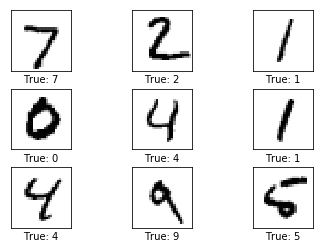

In [143]:
# Get the first images from the test-set.
images = data.test.images[0:9]

# Get the true classes for those images.
cls_true = data.test.cls[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

# Input Functions for the Estimator

We need to create a function that will return the data. This is to add flexibility and re-usability. We will be using the DNNClassifier so the data should be in intiger format. If we want we can also set paramaters here but in this case we will be loading data directly in to memory. 

In [144]:
# Here we create are input function that takes in a numpay array. We can also specify the number of epochs and shuffle. 
# Here set input (x) and target (y)
train_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x": np.array(data.train.images)},
    y=np.array(data.train.cls),
    num_epochs=None,
    shuffle=True)

In [145]:
#This returns a function
train_input_fn

<function tensorflow.python.estimator.inputs.numpy_io.input_fn>

In [146]:
#Calling the function will return the tuple with TF ops.
train_input_fn()

({'x': <tf.Tensor 'random_shuffle_queue_DequeueMany_1:1' shape=(128, 784) dtype=float32>},
 <tf.Tensor 'random_shuffle_queue_DequeueMany_1:2' shape=(128,) dtype=int64>)

In [147]:
# We also need to create a function for the test set. 
test_input_fn= tf.estimator.inputs.numpy_input_fn(x={"x": np.array(data.test.images)},
                                                 y=np.array(data.test.cls),
                                                 num_epochs=1,
                                                 shuffle=False)

In [148]:
test_input_fn()

({'x': <tf.Tensor 'fifo_queue_DequeueUpTo_1:1' shape=(?, 784) dtype=float32>},
 <tf.Tensor 'fifo_queue_DequeueUpTo_1:2' shape=(?,) dtype=int64>)

In [149]:
# And lets take some images for doing the predictions. 
some_images = data.test.images[0:9]

In [150]:
#Input function for predictions
predict_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'x': some_images},
    num_epochs=1,
    shuffle=False)

In [151]:
some_images_cls = data.test.cls[0:9]

# Specify the Canned Estimator

The things we have done:
- Load data. 
- Explore some of the data. 
- Create input function. 

Now it's time to setup an estimator. In this case we are going to use a pre-canned estimator: DNNClassifier. First we will setup the metadata information for the columns.  

In [156]:
# Here we are specifying the type and column shape
#feature_x = tf.feature_column.numeric_column('x', shape=img_shape) # x is the name

In [157]:
# if we would have more features we have to put them together in a list. 
feature_columns = [tf.feature_column.numeric_column('x', shape=img_shape)] 

In [158]:
# In this case we are building a three layer network. Here we specify the amount of hidden units
num_hidden_units =[512, 256, 128] 

In [163]:
#Now it's time to initiate our classifier. Here we also specify the feature columns, hidden units and activation function. 
# We are also going to save our checkpoints in a directory. 
model = tf.estimator.DNNClassifier(feature_columns=feature_columns,
                                  hidden_units=num_hidden_units,
                                  activation_fn=tf.nn.relu,
                                  n_classes=num_classes,
                                  model_dir="./Checkpoints/checkpoints_tutorial17-1/")
                                   #model_dir="./checkpoints_tutorial17-1/")
                                   

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x126512d50>, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': './Checkpoints/checkpoints_tutorial17-1/', '_save_summary_steps': 100}


# Now it's time to train the model!

In [164]:
# We use the model.train function the train the model. 
# Here we also set the input function
model.train(input_fn=train_input_fn, steps=2000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into ./Checkpoints/checkpoints_tutorial17-1/model.ckpt.
INFO:tensorflow:loss = 298.03534, step = 1
INFO:tensorflow:global_step/sec: 110.976
INFO:tensorflow:loss = 24.321064, step = 101 (0.903 sec)
INFO:tensorflow:global_step/sec: 108.484
INFO:tensorflow:loss = 24.434456, step = 201 (0.920 sec)
INFO:tensorflow:global_step/sec: 111.714
INFO:tensorflow:loss = 28.53651, step = 301 (0.897 sec)
INFO:tensorflow:global_step/sec: 112.35
INFO:tensorflow:loss = 10.151123, step = 401 (0.890 sec)
INFO:tensorflow:global_step/sec: 103.114
INFO:tensorflow:loss = 11.103088, step = 501 (0.968 sec)
INFO:tensorflow:global_step/sec: 106.087
INFO:tensorflow:loss = 10.291996, step = 601 (0.943 sec)
INFO:tensorflow:global_step/sec: 109.783
INFO:tensorflow:loss = 9.709423, step = 701 (0.911 sec)
INFO:tensorflow:global_step/sec: 109.685
INFO:tensorflow:loss = 6.4357643, step = 801 (0.912 sec)
INFO:tensorflow:global_step/sec: 92

With this standardized code it is really easy to create a new model with different settings and test how good it performs. 

In [114]:
num_hidden_units2 =[1024, 512, 256] 

In [128]:
model2 = tf.estimator.DNNClassifier(feature_columns=feature_columns,
                                  hidden_units=num_hidden_units2,
                                  activation_fn=tf.nn.relu,
                                  optimizer=tf.train.ProximalAdagradOptimizer(
                                  learning_rate=0.1,
                                  l1_regularization_strength=0.001
                                  ),
                                  n_classes=num_classes,
                                  model_dir="./checkpoints_tutorial3/")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x125d80f10>, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': './checkpoints_tutorial3/', '_save_summary_steps': 100}


In [129]:
model2.train(input_fn=train_input_fn, steps=2000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into ./checkpoints_tutorial3/model.ckpt.
INFO:tensorflow:loss = 302.3125, step = 1
INFO:tensorflow:global_step/sec: 43.033
INFO:tensorflow:loss = 134.62091, step = 101 (2.324 sec)
INFO:tensorflow:global_step/sec: 36.9707
INFO:tensorflow:loss = 54.968197, step = 201 (2.705 sec)
INFO:tensorflow:global_step/sec: 32.9301
INFO:tensorflow:loss = 63.9155, step = 301 (3.038 sec)
INFO:tensorflow:global_step/sec: 40.204
INFO:tensorflow:loss = 51.93029, step = 401 (2.486 sec)
INFO:tensorflow:global_step/sec: 39.6646
INFO:tensorflow:loss = 71.32415, step = 501 (2.523 sec)
INFO:tensorflow:global_step/sec: 33.4938
INFO:tensorflow:loss = 44.90232, step = 601 (2.986 sec)
INFO:tensorflow:global_step/sec: 34.4974
INFO:tensorflow:loss = 21.217262, step = 701 (2.900 sec)
INFO:tensorflow:global_step/sec: 23.6747
INFO:tensorflow:loss = 45.02545, step = 801 (4.224 sec)
INFO:tensorflow:global_step/sec: 29.5981
INFO:tensorflow

# Evaluation

After training the first thing we want to do is evaluate the model that we have build. We will be evaluating the model using the test input function that we have build. 

In [104]:
# Here we set the model.evaluate and specify it to use the test_input_fn
result = model.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Starting evaluation at 2018-03-01-19:30:12
INFO:tensorflow:Restoring parameters from ./checkpoints_tutorial12/model.ckpt-4000
INFO:tensorflow:Finished evaluation at 2018-03-01-19:30:13
INFO:tensorflow:Saving dict for global step 4000: accuracy = 0.9713, average_loss = 0.09161571, global_step = 4000, loss = 11.596925


In [105]:
#Print the results
result

{'accuracy': 0.9713,
 'average_loss': 0.09161571,
 'global_step': 4000,
 'loss': 11.596925}

In [106]:
print("Classification accuracy: {0:.2%}".format(result["accuracy"]))

Classification accuracy: 97.13%


In [130]:
result2 = model2.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Starting evaluation at 2018-03-01-19:44:56
INFO:tensorflow:Restoring parameters from ./checkpoints_tutorial3/model.ckpt-2000
INFO:tensorflow:Finished evaluation at 2018-03-01-19:44:58
INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.9379, average_loss = 0.21088672, global_step = 2000, loss = 26.69452


In [131]:
result2

{'accuracy': 0.9379,
 'average_loss': 0.21088672,
 'global_step': 2000,
 'loss': 26.69452}

In [132]:
print("Classification accuracy: {0:.2%}".format(result2["accuracy"]))

Classification accuracy: 93.79%


# Predictions

Now we are happy with the accuracy of our model we can do a couple of predictions. 

In [47]:
# Here we specify the model predict function. 
predictions = model.predict(input_fn=predict_input_fn)

In [48]:
cls = [p['classes'] for p in predictions]

INFO:tensorflow:Restoring parameters from ./checkpoints_tutorial17-1/model.ckpt-6000


In [49]:
cls_pred = np.array(cls, dtype='int').squeeze()
cls_pred

array([7, 2, 1, 0, 4, 1, 4, 9, 5])

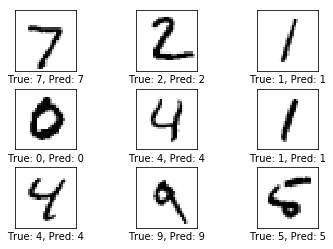

In [51]:
#Let's plot our predictions
plot_images(images=some_images,
            cls_true=some_images_cls,
            cls_pred=cls_pred)